In [ ]:
# Install the kagglehub package
!pip install kagglehub

In [ ]:
# Import necessary libraries
import pandas as pd  # For data manipulation and analysis
import matplotlib.pyplot as plt  # For plotting graphs
import seaborn as sns  # For creating attractive and informative statistical graphics
import kagglehub  # For downloading datasets from Kaggle
import numpy as np  # For numerical operations

In [ ]:
# Download latest version of the file
path = kagglehub.dataset_download("asaniczka/uk-optimal-product-price-prediction")

# Print the path to the dataset files
print("Path to dataset files:", path)

c:\Users\usuar\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: C:\Users\usuar\.cache\kagglehub\datasets\asaniczka\uk-optimal-product-price-prediction\versions\3


In [ ]:
# Load the dataset from the local path
df = pd.read_csv('amz_uk_price_prediction_dataset.csv')

In [3]:
df.head()

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


In [4]:
# Retrieving the number of rows and columns in the dataframe
df.shape

(2443651, 9)

In [7]:
# Displaying the data types of each column in the dataframe
df.dtypes

uid                    int64
asin                  object
title                 object
stars                float64
reviews                int64
price                float64
isBestSeller            bool
boughtInLastMonth      int64
category              object
dtype: object

In [11]:
# Counting and sorting the unique values for each numerical column in descending order
df.nunique().sort_values(ascending=False)

uid                  2443651
asin                 2222742
title                2077591
price                  82916
reviews                19446
category                 296
stars                     42
boughtInLastMonth         25
isBestSeller               2
dtype: int64

In [13]:
category_counts=df ['category'].value_counts()
category_counts

category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
                                           ...  
Motorbike Chassis                            107
Alexa Built-In Devices                       107
Plugs                                        107
Smart Home Security & Lighting               104
Smart Speakers                                54
Name: count, Length: 296, dtype: int64

In [14]:
category_counts.head(5)

category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
Name: count, dtype: int64

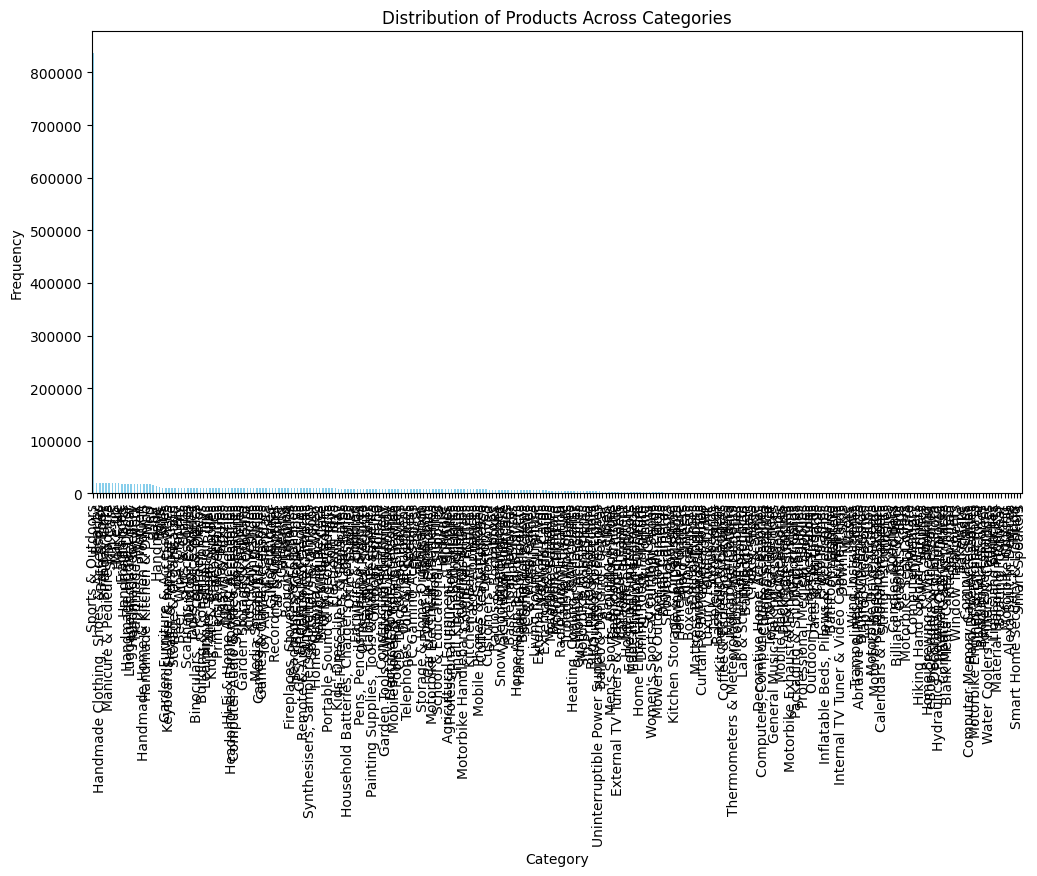

In [17]:
# Display the distribution of products across different categories using a bar chart
plt.figure(figsize=(12, 6))
category_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Products Across Categories')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

In [35]:
# If the chart is hard to understand, do it for a subset of top categories
top_categories = category_counts.head(5)
top_categories

category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
Name: count, dtype: int64

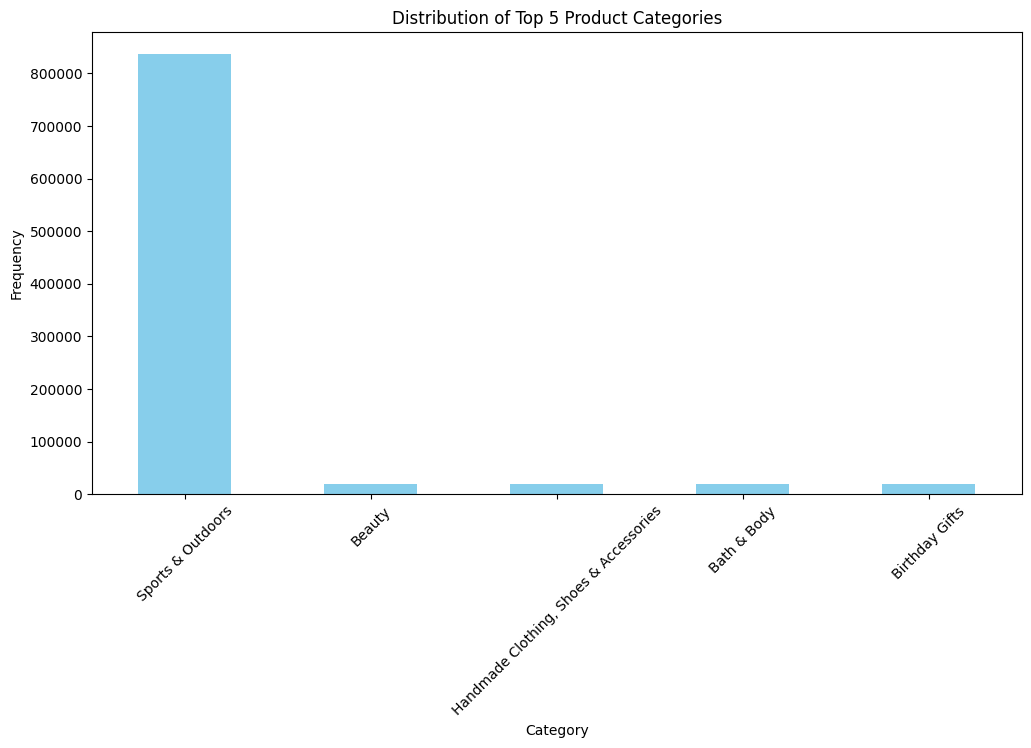

In [24]:
# Display the distribution of top categories using a bar chart
plt.figure(figsize=(12, 6))
top_categories.plot(kind='bar', color='skyblue')
plt.title('Distribution of Top 5 Product Categories')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

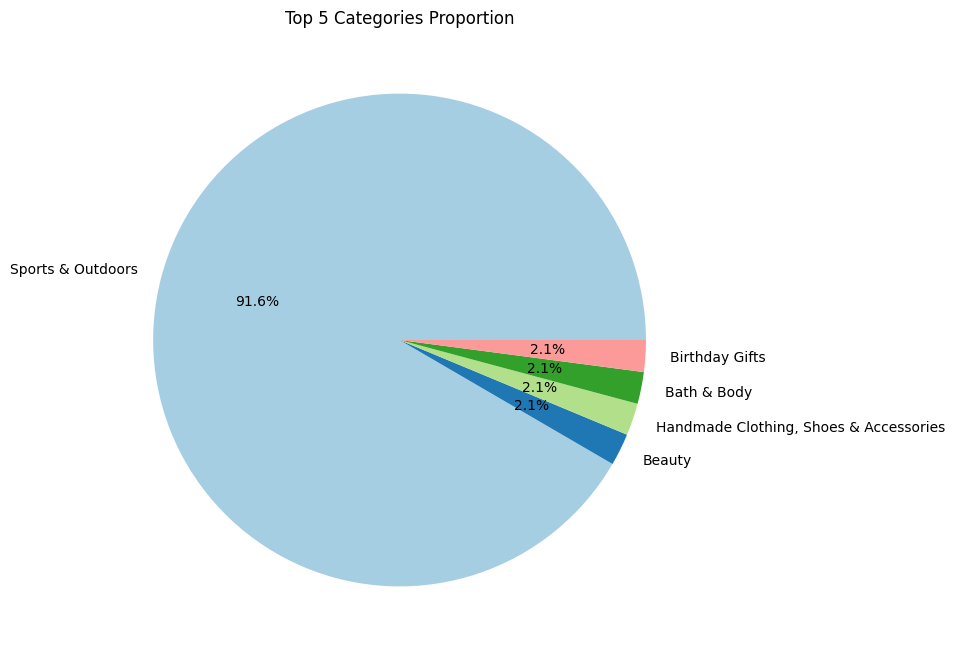

In [25]:
# Visualize the proportions of the top categories using a pie chart
plt.figure(figsize=(8, 8))
top_categories.plot(kind='pie', autopct='%1.1f%%', colors=plt.cm.Paired(range(len(top_categories))))
plt.title('Top 5 Categories Proportion')
plt.ylabel('')
plt.show()

## 1. Which are the top 5 most listed product categories?

1. **Sports & Outdoors**: 836,265
2. **Beauty**: 19,312
3. **Handmade Clothing, Shoes & Accessories**: 19,229
4. **Bath & Body**: 19,092
5. **Birthday Gifts**: 18,978

### Does any category dominate the listings?
- **Sports & Outdoors** dominates the listings with 91.6%.

In [ ]:
#overview of the numerical columns in the dataset
pd.options.display.float_format = '{:.2f}'.format
df.describe()

,uid,stars,reviews,price,boughtInLastMonth
count,2443651.00,2443651.00,2443651.00,2443651.00,2443651.00
mean,1370545.35,2.15,480.63,89.24,25.90
std,816056.17,2.19,5944.12,345.61,240.48
min,1.00,0.00,0.00,0.00,0.00
25%,658921.50,0.00,0.00,9.99,0.00
50%,1349029.00,0.00,0.00,19.09,0.00
75%,2060685.50,4.40,59.00,45.99,0.00
max,2828593.00,5.00,1356658.00,100000.00,50000.00


In [30]:
# Calculate the mean, median, and mode for the price of products
mean_price = df['price'].mean()
median_price = df['price'].median()
mode_price = df['price'].mode()[0]

# Display the results with 2 decimal places
print(f"Mean Price: {mean_price:.2f}")
print(f"Median Price: {median_price:.2f}")
print(f"Mode Price: {mode_price:.2f}")

Mean Price: 89.24
Median Price: 19.09
Mode Price: 9.99


## 2.1 Average and Most Common Price Points

### What's the average price point of products listed?
- **Mean Price**: 89.24

### How does this compare with the most common price point (mode)?
- **Median Price**: 19.09
- **Mode Price**: 9.99

### Analysis
The average price point (mean) of products listed is 89.24, which is significantly higher than both the median price (19.09) and the most common price point (mode) of 9.99. 

This indicates that while there are some high-priced products that raise the average price, the majority of products are priced much lower, as reflected by the median and mode. 

The mode being the lowest suggests that there is a large number of products clustered around the 9.99 price point.

In [33]:
# Display the top 10 most expensive products
most_expensive = df.sort_values(by='price', ascending=False).head(10)
print("Top 10 Most Expensive Products:")
print(most_expensive[['title', 'price']])

# Display the top 10 cheapest products
cheapest = df.sort_values(by='price', ascending=True).head(10)
print("\nTop 10 Cheapest Products:")
print(cheapest[['title', 'price']])

Top 10 Most Expensive Products:
                                                     title     price
2008013                              HB FBA Test Treadmill 100000.00
1987238  Générique L.A 350° - I5 11400F - RTX 3050 8G -...  77752.00
1905315  Abaodam decor christmas ornaments Desk Ornamen...  24674.59
1408966                  BM4445-FI1-01200R10-03-E03 Driver  23482.73
319555   HEDUSA Halloween 3D Holographic Fan 3D Hologra...  22933.42
1490285  YXHUI Kids Girls Figure Skating Dress Long Sle...  21999.00
1490286  YXHUI Kids Girls Figure Skating Dress Long Sle...  21999.00
1907271  Outdoor Furniture Wood Porch Swing Black Brown...  21464.82
1907273  Outdoor Furniture Wood Porch Swing Black Brown...  21464.82
1907272  Outdoor Furniture Wood Porch Swing Black Brown...  21464.82

Top 10 Cheapest Products:
                                                     title  price
836136         Dungeons & Guardians: Battleborne, Book III   0.00
1532255  Folklore and Fables II: An alternative lo

In [34]:
# Calculate the variance, standard deviation, range, and interquartile range for the price of products
variance_price = df['price'].var()
std_dev_price = df['price'].std()
range_price = df['price'].max() - df['price'].min()
iqr_price = df['price'].quantile(0.75) - df['price'].quantile(0.25)

# Display the results with 2 decimal places
print(f"Variance: {variance_price:.2f}")
print(f"Standard Deviation: {std_dev_price:.2f}")
print(f"Range: {range_price:.2f}")
print(f"Interquartile Range (IQR): {iqr_price:.2f}")

Variance: 119445.49
Standard Deviation: 345.61
Range: 100000.00
Interquartile Range (IQR): 36.00


## 2.2 Conclusions Based on Measures of Dispersion for Product Prices

### 1. Variance (119445.49)
The high variance indicates that there is a significant spread in the product prices. Variance measures the average squared deviation from the mean, and a high value suggests that prices vary widely from the average price.

### 2. Standard Deviation (345.61)
The standard deviation, which is the square root of the variance, is also quite high. This indicates that, on average, product prices deviate significantly from the mean price. A higher standard deviation means more variability in the prices.

### 3. Range (100000.00)
The range, which is the difference between the maximum and minimum prices, is extremely large. This suggests that there are products with prices that are significantly higher or lower than others, indicating a wide spread in the overall price distribution.

### 4. Interquartile Range (IQR) (36.00)
The IQR, which measures the spread of the middle 50% of prices, is relatively small compared to the range. This indicates that while there are extreme values (outliers) causing a large range, the majority of product prices are clustered within a narrower range.

In [63]:
# Calculate the number of bins using Sturges' formula for the price column
num_bins_price = int(np.ceil(np.log2(df['price'].size) + 1))

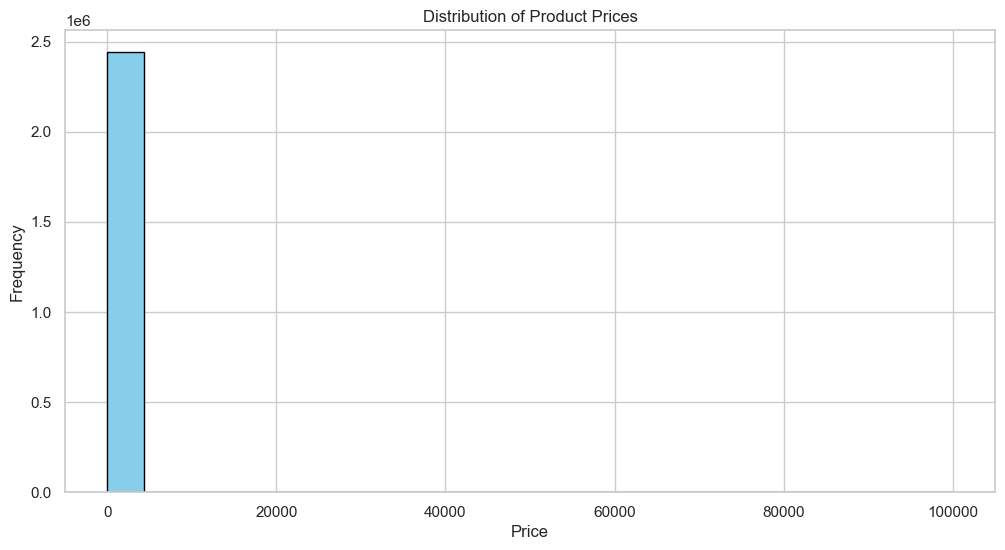

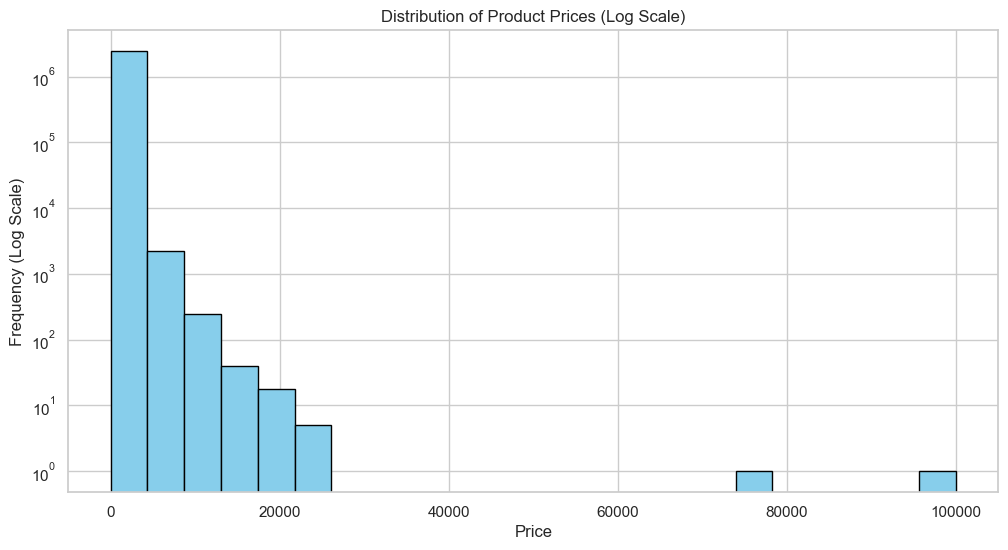

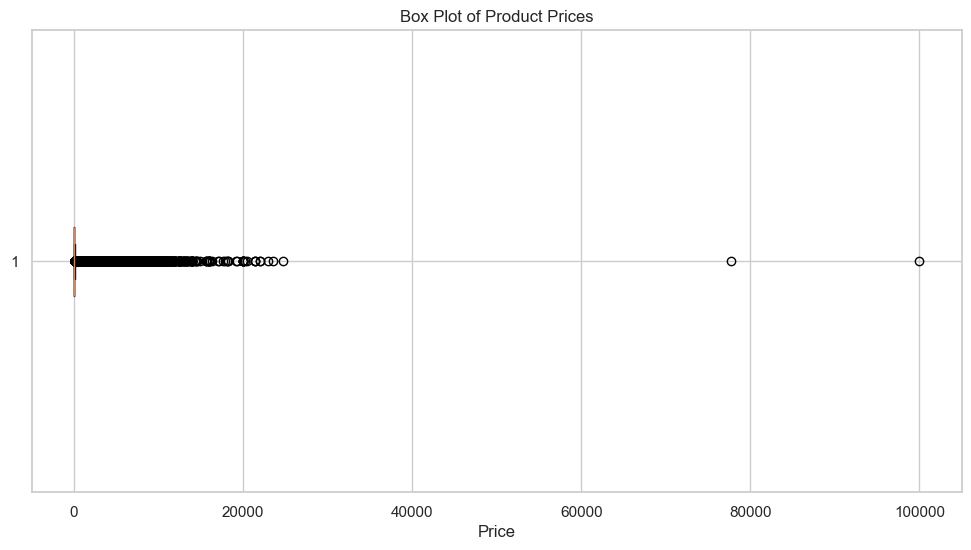

In [64]:
# Histogram to visualize the distribution of product prices
plt.figure(figsize=(12, 6))
plt.hist(df['price'], bins=num_bins_price, color='skyblue', edgecolor='black')
plt.title('Distribution of Product Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# If the histogram is hard to read, consider using a log scale
plt.figure(figsize=(12, 6))
plt.hist(df['price'], bins=num_bins_price, color='skyblue', edgecolor='black', log=True)
plt.title('Distribution of Product Prices (Log Scale)')
plt.xlabel('Price')
plt.ylabel('Frequency (Log Scale)')
plt.show()

# Box plot to showcase the spread and potential outliers in product pricing
plt.figure(figsize=(12, 6))
plt.boxplot(df['price'], vert=False)
plt.title('Box Plot of Product Prices')
plt.xlabel('Price')
plt.show()

In [45]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['price'] < lower_bound) | (df['price'] > upper_bound)]

# Count the number of outliers below the lower bound and above the upper bound
num_lower_outliers = outliers[outliers['price'] < lower_bound].shape[0]
num_upper_outliers = outliers[outliers['price'] > upper_bound].shape[0]

# Display the results
print(f"Number of outliers below the lower bound: {num_lower_outliers}")
print(f"Number of outliers above the upper bound: {num_upper_outliers}")

# Display the outliers
print("Outliers in product prices:")
print(outliers[['title', 'price']])

Number of outliers below the lower bound: 0
Number of outliers above the upper bound: 327688
Outliers in product prices:
                                                     title  price
10       JBL Charge 5 - Portable Bluetooth Speaker with... 139.00
19       Echo Studio | Our best-sounding Wi-Fi and Blue... 164.99
25       All-new Echo Show 8 | 3rd generation (2023 rel... 149.99
28       JBL PartyBox110 Portable Indoor and Outdoor Pa... 289.00
31       Echo Show 15 | Full HD 15.6" smart display wit... 199.99
...                                                    ...    ...
2443619  Motorcycle Clothing Suit - Motorbike Suit With... 166.99
2443627     Racer Beasty Ladies Leather Motorbike Trousers 152.58
2443638  SHIMA EXO Vented, Motorbike Shoes for Women | ... 108.77
2443641  Motorcycle Clothing Suit - Motorbike Suit With... 166.99
2443643  Motorcycle Clothing Suit - Motorbike Suit With... 158.99

[327688 rows x 2 columns]


In [46]:
# Count the number of products with a price of 0
num_zero_price_products = df[df['price'] == 0].shape[0]

# Display the result
print(f"Number of products with a price of 0: {num_zero_price_products}")

Number of products with a price of 0: 20


In [50]:
# Count the number of products with a price between 0 and 1
num_zero_to_one_price_products = df[(df['price'] > 0) & (df['price'] <= 1)].shape[0]

# Display the result
print(f"Number of products with a price between 0 and 1: {num_zero_to_one_price_products}")

Number of products with a price between 0 and 1: 3519


In [48]:
# Count the number of products with a price between 0 and 10
num_zero_to_ten_price_products = df[(df['price'] >= 0) & (df['price'] <= 10)].shape[0]

# Display the result
print(f"Number of products with a price between 0 and 10: {num_zero_to_ten_price_products}")

Number of products with a price between 0 and 10: 633419


In [47]:
# Count the number of products with a price between 0 and 100
num_zero_to_hundred_price_products = df[(df['price'] >= 0) & (df['price'] <= 100)].shape[0]

# Display the result
print(f"Number of products with a price between 0 and 100: {num_zero_to_hundred_price_products}")

Number of products with a price between 0 and 100: 2116397


## 2.3 Conclusions on Outliers in Product Prices

### Number of Products with Specific Price Ranges
- **Number of products with a price of 0**: 20
  - There are 20 products listed with a price of 0, which might indicate free items, promotional products, or data entry errors.

- **Number of products with a price between 0 and 10**: 633,419
  - A significant number of products (633,419) are priced between 0 and 10. This suggests that a large portion of the product listings are low-cost items.

- **Number of products with a price between 0 and 100**: 2,116,397
  - The majority of products (2,116,397) fall within the 0 to 100 price range, indicating that most products are relatively affordable.

### Outliers in Product Prices
- **Number of outliers below the lower bound**: 0
  - There are no products with prices significantly lower than the expected range. This indicates that there are no unusually cheap products in the dataset.

- **Number of outliers above the upper bound**: 327,688
  - There is a substantial number of products (327,688) with prices significantly higher than the expected range. This indicates a large number of high-priced products that are considered outliers.

### Analysis

- The absence of outliers below the lower bound suggests that the lower end of the product price distribution is relatively stable and does not contain unusually low prices.
- The large number of outliers above the upper bound indicates that there are many products with prices much higher than the typical range. This could be due to premium products, luxury items, or products with higher value propositions.
- The significant number of high-priced outliers suggests that the product price distribution is heavily skewed towards higher prices. This skewness can impact the overall analysis and should be taken into account when making business decisions related to pricing strategies and inventory management.
- The high number of products within the 0 to 10 and 0 to 100 price ranges indicates that most products are relatively affordable, with a significant portion being low-cost items.

These conclusions highlight the importance of considering the presence of high-priced outliers in the dataset and their potential impact on business insights and decisions. Additionally, the large number of low-cost products suggests that the market is competitive with many affordable options available to consumers.

In [51]:
# Calculate the mean, median, and mode for the rating of products
mean_rating = df['stars'].mean()
median_rating = df['stars'].median()
mode_rating = df['stars'].mode()[0]

# Display the results with 2 decimal places
print(f"Mean Rating: {mean_rating:.2f}")
print(f"Median Rating: {median_rating:.2f}")
print(f"Mode Rating: {mode_rating:.2f}")

Mean Rating: 2.15
Median Rating: 0.00
Mode Rating: 0.00


## 3.1 Measures of Centrality for Product Ratings

### Mean Rating: 2.15
- The average rating of products is 2.15, which suggests that, on average, products receive relatively low ratings from customers.

### Median Rating: 0.00
- The median rating is 0.00, indicating that at least half of the products have a rating of 0. This could suggest a significant number of unrated or poorly rated products.

### Mode Rating: 0.00
- The most common rating (mode) is 0.00, which further supports the observation that many products have a rating of 0.

### Analysis
- The low mean rating of 2.15, combined with the median and mode both being 0.00, suggests that a large portion of the products have not been rated or have received very low ratings.
- This trend could indicate issues with product quality, customer satisfaction, or a lack of customer engagement in providing ratings.
- Businesses should investigate the reasons behind the low ratings and consider strategies to improve product quality and encourage customers to leave positive reviews.

These conclusions highlight the importance of addressing the low ratings and understanding the underlying causes to improve customer satisfaction and product performance on Amazon UK.

In [52]:
# Calculate the mean, median, and mode for the reviews of products
mean_reviews = df['reviews'].mean()
median_reviews = df['reviews'].median()
mode_reviews = df['reviews'].mode()[0]

# Display the results with 2 decimal places
print(f"Mean Reviews: {mean_reviews:.2f}")
print(f"Median Reviews: {median_reviews:.2f}")
print(f"Mode Reviews: {mode_reviews:.2f}")

Mean Reviews: 480.63
Median Reviews: 0.00
Mode Reviews: 0.00


## 3.1 Measures of Centrality for Product Reviews

### Mean Reviews: 480.63
- The average number of reviews per product is 480.63, indicating that, on average, products receive a moderate number of reviews. However, this average may be skewed by a few products with a very high number of reviews.

### Median Reviews: 0.00
- The median number of reviews is 0.00, suggesting that at least half of the products have no reviews. This indicates a significant number of products with no customer feedback.

### Mode Reviews: 0.00
- The most common number of reviews (mode) is 0.00, indicating that many products have no reviews at all.

### Analysis
- The high mean number of reviews (480.63) combined with the median and mode both being 0.00 suggests that while some products receive a large number of reviews, a substantial portion of products have no reviews.
- This trend could indicate issues with customer engagement, where many products do not receive any feedback from customers.
- Businesses should investigate the reasons behind the lack of reviews for many products and consider strategies to encourage customers to leave reviews, such as follow-up emails, incentives, or improving the visibility of the review process.

These conclusions highlight the importance of addressing the lack of customer reviews and understanding the underlying causes to improve customer engagement and feedback on Amazon UK.

In [53]:
# Calculate the variance, standard deviation, and interquartile range for the rating of products
variance_rating = df['stars'].var()
std_dev_rating = df['stars'].std()
iqr_rating = df['stars'].quantile(0.75) - df['stars'].quantile(0.25)

# Display the results with 2 decimal places
print(f"Variance: {variance_rating:.2f}")
print(f"Standard Deviation: {std_dev_rating:.2f}")
print(f"Interquartile Range (IQR): {iqr_rating:.2f}")

Variance: 4.82
Standard Deviation: 2.19
Interquartile Range (IQR): 4.40


In [55]:
# Calculate the variance, standard deviation, and interquartile range for the reviews of products
variance_reviews = df['reviews'].var()
std_dev_reviews = df['reviews'].std()
iqr_reviews = df['reviews'].quantile(0.75) - df['reviews'].quantile(0.25)

# Display the results with 2 decimal places
print(f"Variance: {variance_reviews:.2f}")
print(f"Standard Deviation: {std_dev_reviews:.2f}")
print(f"Interquartile Range (IQR): {iqr_reviews:.2f}")

Variance: 35332611.92
Standard Deviation: 5944.12
Interquartile Range (IQR): 59.00


## 3.2 Measures of Dispersion for Product Ratings

### Variance: 4.82
- The variance of product ratings is 4.82, indicating the average squared deviation from the mean rating.

### Standard Deviation: 2.19
- The standard deviation of product ratings is 2.19, representing the average deviation from the mean rating.

### Interquartile Range (IQR): 4.40
- The interquartile range (IQR) of product ratings is 4.40, indicating the spread of the middle 50% of ratings.

### Analysis
- The variance and standard deviation values suggest a moderate level of variability in product ratings. This indicates that customer feedback is somewhat inconsistent.
- The IQR value of 4.40 suggests that the middle 50% of ratings are spread out over a wide range, further indicating variability in customer feedback.
- Overall, the product ratings show a wide variation, suggesting that customer experiences with products are quite diverse.

## Measures of Dispersion for Product Reviews

### Variance: 35,332,611.92
- The variance of product reviews is 35,332,611.92, indicating the average squared deviation from the mean number of reviews.

### Standard Deviation: 5,944.12
- The standard deviation of product reviews is 5,944.12, representing the average deviation from the mean number of reviews.

### Interquartile Range (IQR): 59.00
- The interquartile range (IQR) of product reviews is 59.00, indicating the spread of the middle 50% of reviews.

### Analysis
- The extremely high variance and standard deviation values suggest a significant level of variability in the number of reviews. This indicates that customer engagement in providing reviews is highly inconsistent.
- The IQR value of 59.00 suggests that the middle 50% of reviews are relatively close together, but the high variance and standard deviation indicate that there are many products with a very high number of reviews, skewing the overall distribution.
- Overall, the number of reviews shows a wide variation, with some products receiving a large number of reviews while many others receive few or none.

These conclusions highlight the importance of addressing the variability in both product ratings and reviews to improve customer satisfaction and engagement on Amazon UK.

In [56]:
# Calculate skewness and kurtosis for the rating (stars) column
skewness_stars = df['stars'].skew()
kurtosis_stars = df['stars'].kurtosis()

# Display the results for stars
print(f"Skewness (Stars): {skewness_stars:.2f}")
print(f"Kurtosis (Stars): {kurtosis_stars:.2f}")

# Calculate skewness and kurtosis for the reviews column
skewness_reviews = df['reviews'].skew()
kurtosis_reviews = df['reviews'].kurtosis()

# Display the results for reviews
print(f"Skewness (Reviews): {skewness_reviews:.2f}")
print(f"Kurtosis (Reviews): {kurtosis_reviews:.2f}")

Skewness (Stars): 0.08
Kurtosis (Stars): -1.93
Skewness (Reviews): 102.82
Kurtosis (Reviews): 17741.01


## 3.3 Shape of the Distribution for Product Ratings

### Skewness (Stars): 0.08
- The skewness of product ratings is 0.08, indicating that the distribution is nearly symmetrical. A skewness close to 0 suggests that the ratings are evenly distributed around the mean.

### Kurtosis (Stars): -1.93
- The kurtosis of product ratings is -1.93, indicating that the distribution is platykurtic. This means that the distribution has lighter tails and a flatter peak compared to a normal distribution.

### Analysis
- The near-zero skewness suggests that the ratings are not significantly skewed towards higher or lower values, indicating a balanced distribution of ratings.
- The negative kurtosis value indicates that the ratings distribution is flatter and has fewer extreme values compared to a normal distribution.

## Shape of the Distribution for Product Reviews

### Skewness (Reviews): 102.82
- The skewness of product reviews is 102.82, indicating a highly positively skewed distribution. This suggests that the majority of products have a low number of reviews, with a few products having a very high number of reviews.

### Kurtosis (Reviews): 17741.01
- The kurtosis of product reviews is 17741.01, indicating a highly leptokurtic distribution. This means that the distribution has heavy tails and a sharp peak, with many extreme values.

### Analysis
- The extremely high skewness value indicates that the number of reviews is heavily skewed towards lower values, with most products receiving few or no reviews and a few products receiving a very high number of reviews.
- The extremely high kurtosis value suggests that the distribution of reviews has many extreme values, indicating that a small number of products receive a disproportionately high number of reviews.

These conclusions highlight the importance of addressing the variability in both product ratings and reviews to improve customer satisfaction and engagement on Amazon UK. The balanced distribution of ratings suggests that customer experiences are varied, while the highly skewed and leptokurtic distribution of reviews indicates that customer engagement in providing reviews is highly inconsistent.

In [60]:
# Calculate the number of bins using Sturges' formula
num_bins_stars = int(np.ceil(np.log2(df['stars'].size) + 1))
num_bins_reviews = int(np.ceil(np.log2(df['reviews'].size) + 1))

print(f"Number of bins for stars: {num_bins_stars}")
print(f"Number of bins for reviews: {num_bins_reviews}")

Number of bins for stars: 23
Number of bins for reviews: 23


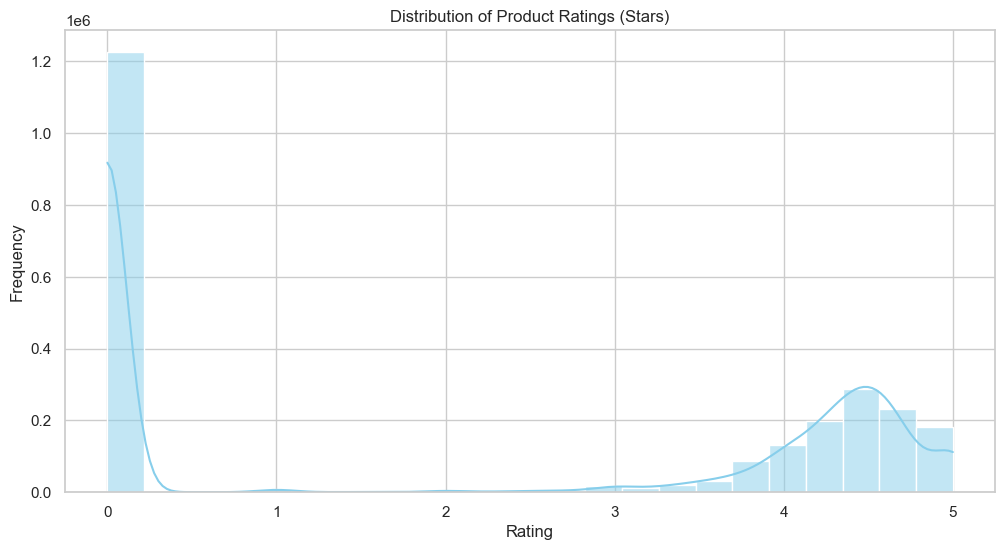

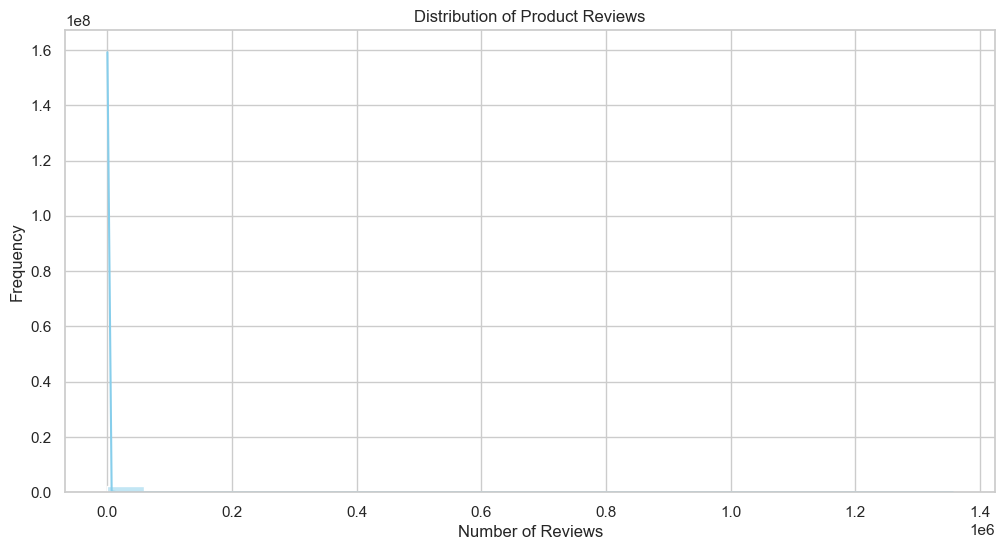

In [62]:
# Set the style of seaborn
sns.set(style="whitegrid")

# Plot a histogram to visualize the distribution of product ratings (stars)
plt.figure(figsize=(12, 6))
sns.histplot(df['stars'], bins=num_bins_stars, kde=True, color='skyblue')
plt.title('Distribution of Product Ratings (Stars)')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

# Plot a histogram to visualize the distribution of product reviews
plt.figure(figsize=(12, 6))
sns.histplot(df['reviews'], bins=num_bins_reviews, kde=True, color='skyblue')
plt.title('Distribution of Product Reviews')
plt.xlabel('Number of Reviews')
plt.ylabel('Frequency')
plt.show()

## 3.4 Distribution of Product Ratings

### Is there a specific rating that is more common?
- Based on the histogram of product ratings, the most common rating is **0.00**. This is indicated by the highest bar in the histogram.
- The next most common rating is approximately **4.5**, which is also represented by a significant peak in the histogram.

### Analysis
- The fact that the most common rating is 0.00 suggests that many products have not been rated or have received very low ratings.
- The presence of a peak around 4.5 indicates that among the products that do receive ratings, a significant number of them are rated relatively high.
- This bimodal distribution suggests a disparity in customer engagement, with many products either not receiving ratings or receiving high ratings.

These conclusions highlight the importance of addressing the lack of ratings for many products and understanding the factors that contribute to higher ratings for others.